# Linear Regression
### Notebook by [Kevin Huang](https://kevin8523.github.io/)

In [59]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

***Set up dataset into a dataframe to practice ML***

In [60]:
# datasets
boston = load_boston()

In [61]:
# Set up data in a dataframe like a realworld problem
df = pd.DataFrame(data = boston.data)

In [62]:
# Name columns
df.columns = boston.feature_names

In [63]:
# Add Price feature >> Target or Y Variable
df["PRICE"] = boston.target

In [64]:
# Convert Chas to Categorical for practice
df['CHAS'] = df['CHAS'].replace([0], 'Charles River')
df['CHAS'] = df['CHAS'].replace([1], 'Tract Bounds River')

In [65]:
# Show values on a category
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

***Description of Variables***

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. PRICE - Median value of owner-occupied homes in $1000's

***Summary Statistics***

In [66]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,Charles River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,Charles River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,Charles River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,Charles River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,Charles River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***Split the dataset: Train & test set*** <br/>

Only need to do this if you're manipulating the dataset (Filling missing data, transformation, etc). When splitting between the training and test set, you want to keep it separate

In [30]:
# Randomize dataset for split
df = df.reindex(np.random.permutation(df.index)) # randomizes index
df = df.sort_index() # sorts index 
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.05188,0.0,4.49,Charles River,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5
1,0.23912,0.0,9.69,Charles River,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
2,0.08829,12.5,7.87,Charles River,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
3,0.04301,80.0,1.91,Charles River,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
4,0.14866,0.0,8.56,Charles River,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5


In [67]:
# Split dataset to train & test set
train = df.iloc[:354, :]
test = df.iloc[354:, :]
print(train.shape)
print(test.shape)

(354, 14)
(152, 14)


In [68]:
# Removes PRICE from train & test set
y_train = train.pop('PRICE').values
y_test = test.pop('PRICE').values

***Setup data for ML: Train set***

***3 Step Process***: Import, Instantiate, Fit 

In [71]:
# Import Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Transforming Categorical Columns

In [72]:
#from sklearn.compose import ColumnTransformer
# Imputate Missing values
cat_si_step = ('si', SimpleImputer(strategy='constant',
               fill_value='MISSING'))
# One hot encoding
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]

# Create pipeline for categorical data
cat_pipe = Pipeline(cat_steps)
cat_cols = ['CHAS']

# Ran below as well
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

#### Transforming Numeric Columns

In [73]:
# Data types for the dataset
kinds = np.array([dt.kind for dt in train.dtypes])

In [74]:
# Creates all the columns from the training data
all_columns = train.columns.values

# Selects all non Objects >> numeric
is_num = kinds != 'O'

# Selects all the columns that are numeric
num_cols = all_columns[is_num]

# Gets all of the columns not numeric >> Categorical
cat_cols = all_columns[~is_num]

In [75]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# Impute & Normalize data
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]

# Create pipeline for numeric data
num_pipe = Pipeline(num_steps)

# Ran below
num_transformers = [('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=num_transformers)
X_num_transformed = ct.fit_transform(train)
X_num_transformed.shape

(354, 12)

#### Transforming Both Columns

In [76]:
transformers = [('cat', cat_pipe, cat_cols),
                ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)
X = ct.fit_transform(train)
X.shape

(354, 14)

#### Apply to the Test Set

In [77]:
ml_pipe = Pipeline([('transform', ct), ('lm', LinearRegression())])
ml_pipe.fit(train, y)

Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('si', SimpleImputer(copy=True, fill_value='MISSING', missing_values=nan,
       strategy='constant', verbos...), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [78]:
ml_pipe.predict(test)
#ml_pipe.score(train,y)

array([20.20870372, 19.8993281 , 16.98831164, 12.90275772, 13.09985981,
       13.02501756, 12.1856367 , 13.24313107, 11.92098966, 13.74655673,
       13.65376839, 12.27211407, 13.78086973, 20.36664539, 13.65934464,
       15.09699391, 15.71812584, 18.29813734, 17.12407843, 23.54274271,
       28.1887456 , 25.00422502, 24.32912142, 20.64990527, 29.04629838,
       25.13002647, 66.09338346, 23.86712317, 19.50835175, 19.05214375,
       27.17300413, 25.53699674, 29.04055482, 29.08402324, 23.69656849,
       18.12864952, 16.6487354 , 16.23031395, 20.97375554, 17.75294201,
       20.57572949, 18.30907309, 17.18430977, 18.02132695, 38.1494303 ,
       22.05512231, 29.74904746, 22.26105375, 19.54400797, 27.7619194 ,
       39.56059156, 53.95494229, 26.48633471, 19.65244866, 20.85263602,
       24.24445733, 43.26777125, 24.31625521, 28.87322811, 31.6143226 ,
       43.51462389, 26.74523079, 22.16899145, 30.5101912 , 57.08712086,
       21.77378558, 18.77715479, 16.41491235, 20.44294921, 19.97

***Apply ML***

In [15]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

In [105]:
# Instantiate Model
lm = LinearRegression()

# Fit data to model
lm.fit(train, y_train)


# Predict 
y_pred = lm.predict(X_test)

In [115]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

30.69703770408881


***Visualize Data***

In [107]:
# Import Libraries
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

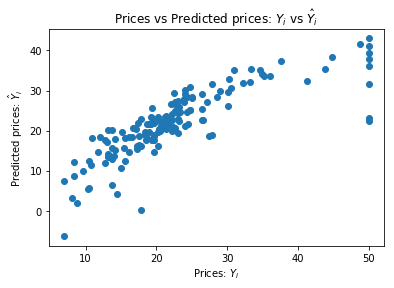

In [108]:
# Plot Visual
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

***Merge data back together***

In [90]:
# Append dataframe
df = train.append(test)
df.shape

(506, 14)

***Creating a pipeline***

In [17]:
# Column Transformer
cat_si_step = ('si', SimpleImputer(strategy='constant',
                                   fill_value='MISSING'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False)) # Reshape data to work on new Pandas ohe
cat_steps = [cat_si_step,cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_cols = ['CHAS']
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)